In [5]:
# Find path to PySpark.
import findspark
findspark.init('/Users/Steve/spark-2.0.2-bin-hadoop2.6')

# Import PySpark and initialize SparkContext object.
import pyspark
from pyspark.sql import SQLContext
sc = pyspark.SparkContext()

#Pass SparkContext object to SQL Context
sqlContext = SQLContext(sc)

In [14]:
#Preview JSON file
with open ('data\Census_2010.json') as fileObject:
    for i in range(0,10):
        print (fileObject.readline())

{"age":"0","females":"1994141","males":"2085528","total":"4079669","year":"2010"}

{"age":"1","females":"1997991","males":"2087350","total":"4085341","year":"2010"}

{"age":"2","females":"2000746","males":"2088549","total":"4089295","year":"2010"}

{"age":"3","females":"2002756","males":"2089465","total":"4092221","year":"2010"}

{"age":"4","females":"2004366","males":"2090436","total":"4094802","year":"2010"}

{"age":"5","females":"2005925","males":"2091803","total":"4097728","year":"2010"}

{"age":"6","females":"2007781","males":"2093905","total":"4101686","year":"2010"}

{"age":"7","females":"2010281","males":"2097080","total":"4107361","year":"2010"}

{"age":"8","females":"2013771","males":"2101670","total":"4115441","year":"2010"}

{"age":"9","females":"2018603","males":"2108014","total":"4126617","year":"2010"}



In [9]:
#Read data as dataframe
CensusDF = sqlContext.read.json('data\Census_2010.json')

#Check CensusDF type
print('CensusDF Datatype:', type(CensusDF))

CensusDF Datatype: <class 'pyspark.sql.dataframe.DataFrame'>


In [10]:
#Print inferred schema
CensusDF.printSchema()

root
 |-- age: string (nullable = true)
 |-- females: string (nullable = true)
 |-- males: string (nullable = true)
 |-- total: string (nullable = true)
 |-- year: string (nullable = true)



In [11]:
#Print first 5 lines of dataframe
CensusDF.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [18]:
#Obtain first five rows as row objects
firstFiveRows = CensusDF.head(5)

#Print ages in first 5 rows
for i in range (0,5):
    print ('Row ', i, ' Age:',firstFiveRows[i].age)

Row  0  Age: 0
Row  1  Age: 1
Row  2  Age: 2
Row  3  Age: 3
Row  4  Age: 4


In [19]:
#Select columns age, males, and females
ageMalesFemalesCols = CensusDF.select('age', 'males', 'females')
ageMalesFemalesCols.show(5)

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
+---+-------+-------+
only showing top 5 rows



In [21]:
#Select rows with age >50
ageFifty = CensusDF[CensusDF['age']>50]
ageFifty.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
| 51|2324721|2247349|4572070|2010|
| 52|2306106|2223261|4529367|2010|
| 53|2270038|2179406|4449444|2010|
| 54|2221350|2121536|4342886|2010|
| 55|2167706|2059204|4226910|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [26]:
#Select rows where # females > # males
femaleMoreMaleLess = CensusDF[CensusDF['females']>CensusDF['males']]
femaleMoreMaleLess.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
| 34|2025969|2020204|4046173|2010|
| 35|2029981|2018080|4048061|2010|
| 36|2036269|2018137|4054406|2010|
| 37|2045241|2022787|4068028|2010|
| 38|2056401|2032469|4088870|2010|
| 39|2070132|2046398|4116530|2010|
| 40|2085229|2061474|4146703|2010|
| 41|2099423|2076069|4175492|2010|
| 42|2123189|2098014|4221203|2010|
| 43|2160806|2130169|4290975|2010|
| 44|2205936|2167507|4373443|2010|
| 45|2247630|2201679|4449309|2010|
| 46|2287688|2233787|4521475|2010|
| 47|2317309|2256546|4573855|2010|
| 48|2330869|2265290|4596159|2010|
| 49|2331572|2262342|4593914|2010|
| 50|2329647|2256294|4585941|2010|
| 51|2324721|2247349|4572070|2010|
| 52|2306106|2223261|4529367|2010|
| 53|2270038|2179406|4449444|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



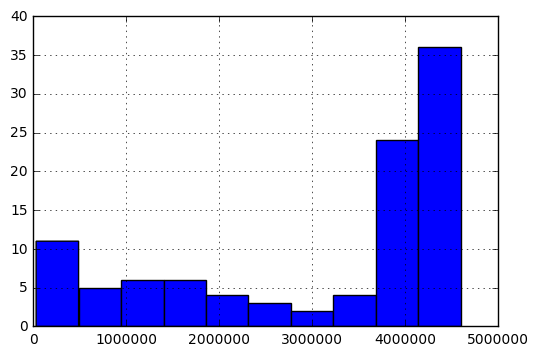

In [30]:
#Convert Spark Dataframe to Pandas Dataframe
CensusPandas = CensusDF.toPandas()

#Use Pandas dataframe to display a histogram of column 'total'
%matplotlib inline
CensusPandas['total'] = CensusPandas['total'].astype(float)
CensusPandas['total'].hist()

In [31]:
sc.stop()